## Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1.Dataset

In [11]:
dataset_airbnb =pd.read_csv("https://raw.githubusercontent.com/diman25pt/Tese/main/Recolha%20e%20tratamento%20da%20base%20de%20dados%20Parte%201.csv")

In [12]:
dataset_airbnb.head()

,host_since,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2019-07-12,Belm,38.671280,-9.230640,Entire home/apt,6,1 bath,3.0,5.0,"[""Game console"", ""Shampoo"", ""Fire extinguisher...",...,2022-09-03,4.86,4.86,4.76,4.90,4.90,4.76,4.71,1,0.56
1,2014-10-05,Aveiras de Cima,39.165900,-8.884790,Private room,2,1 private bath,1.0,1.0,"[""Free parking on premises"", ""Bed linens"", ""Sm...",...,2022-08-31,5.00,5.00,4.88,5.00,5.00,4.63,5.00,1,2.14
2,2018-03-01,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,6,3 baths,3.0,6.0,"[""Waterfront"", ""Baby safety gates"", ""Washer"", ...",...,2022-08-18,4.78,4.78,4.83,4.83,4.83,4.28,4.64,2,0.89
3,2018-04-22,Carcavelos e Parede,38.684360,-9.351100,Entire home/apt,4,3 baths,2.0,2.0,"[""Washer"", ""Fire extinguisher"", ""Pool"", ""Free ...",...,2022-08-26,4.60,4.40,4.50,4.50,4.60,4.90,4.60,20,1.75
4,2018-09-04,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,4,1 bath,2.0,2.0,"[""Waterfront"", ""Shampoo"", ""Fire extinguisher"",...",...,2022-08-29,4.25,4.75,4.67,4.92,4.92,4.83,4.33,3,0.27


In [13]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14312 entries, 0 to 14311
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      14312 non-null  object 
 1   neighbourhood_cleansed          14312 non-null  object 
 2   latitude                        14312 non-null  float64
 3   longitude                       14312 non-null  float64
 4   room_type                       14312 non-null  object 
 5   accommodates                    14312 non-null  int64  
 6   bathrooms_text                  14312 non-null  object 
 7   bedrooms                        14312 non-null  float64
 8   beds                            14312 non-null  float64
 9   amenities                       14312 non-null  object 
 10  price                           14312 non-null  float64
 11  minimum_nights                  14312 non-null  int64  
 12  maximum_nights                  

# Price


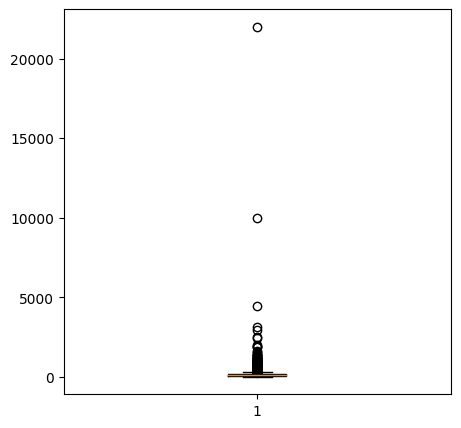

In [14]:
fig = plt.figure(figsize =(5, 5))

# Creating plot
plt.boxplot(dataset_airbnb['price'])

# show plot
plt.show()


# Observations:
 -Longitude, accomodates, availability_90 Latitude are the only attributes that are not badly skewed.

  - Our target Vector in particular is highly positively skewed and needs attention.

  - They all seem to have a lot of outliers.

  - Bathrooms, , beds, bedrooms are positively correlated with the price.

Price cap is clearly visible at 10,000, but it shouldn't be a problem for us as we will be filtering out such expensive night stays for our model to predict well.

There are straight lines visible in the bathroom scatter plot as well.

In [15]:
# Finding skewness of the following attributes
cols = ['longitude', 'latitude','price',  'bedrooms', 'beds', 'accommodates', 'maximum_nights', 'minimum_nights','review_scores_accuracy','number_of_reviews',
       'reviews_per_month','availability_30','availability_60','availability_365','review_scores_communication','calculated_host_listings_count']
def finding_skewness():
    for col in cols:
        print(f'{col} has a skewness of {dataset_airbnb[col].skew(skipna = True)}')

finding_skewness()


longitude has a skewness of -1.146867380545801
latitude has a skewness of 3.0012753855848557
price has a skewness of 61.0399146788336
bedrooms has a skewness of 3.038855171722323
beds has a skewness of 2.953537476029236
accommodates has a skewness of 1.7949148533630055
maximum_nights has a skewness of 16.761324538244157
minimum_nights has a skewness of 24.81162892381619
review_scores_accuracy has a skewness of -4.45392734029355
number_of_reviews has a skewness of 3.2347920206569865
reviews_per_month has a skewness of 5.840669370019606
availability_30 has a skewness of 1.2957579868511773
availability_60 has a skewness of 0.5186111016929156
availability_365 has a skewness of -0.5684473156192325
review_scores_communication has a skewness of -4.761607902450474
calculated_host_listings_count has a skewness of 5.015214360217701


Price as our target variable with a skewness of 28.71 it could be a huge problem. We could do the following to fix the problem:

- we could filter out the outliers carefully looking at the box plot
- we could also take the log of price to further bring down the skewness

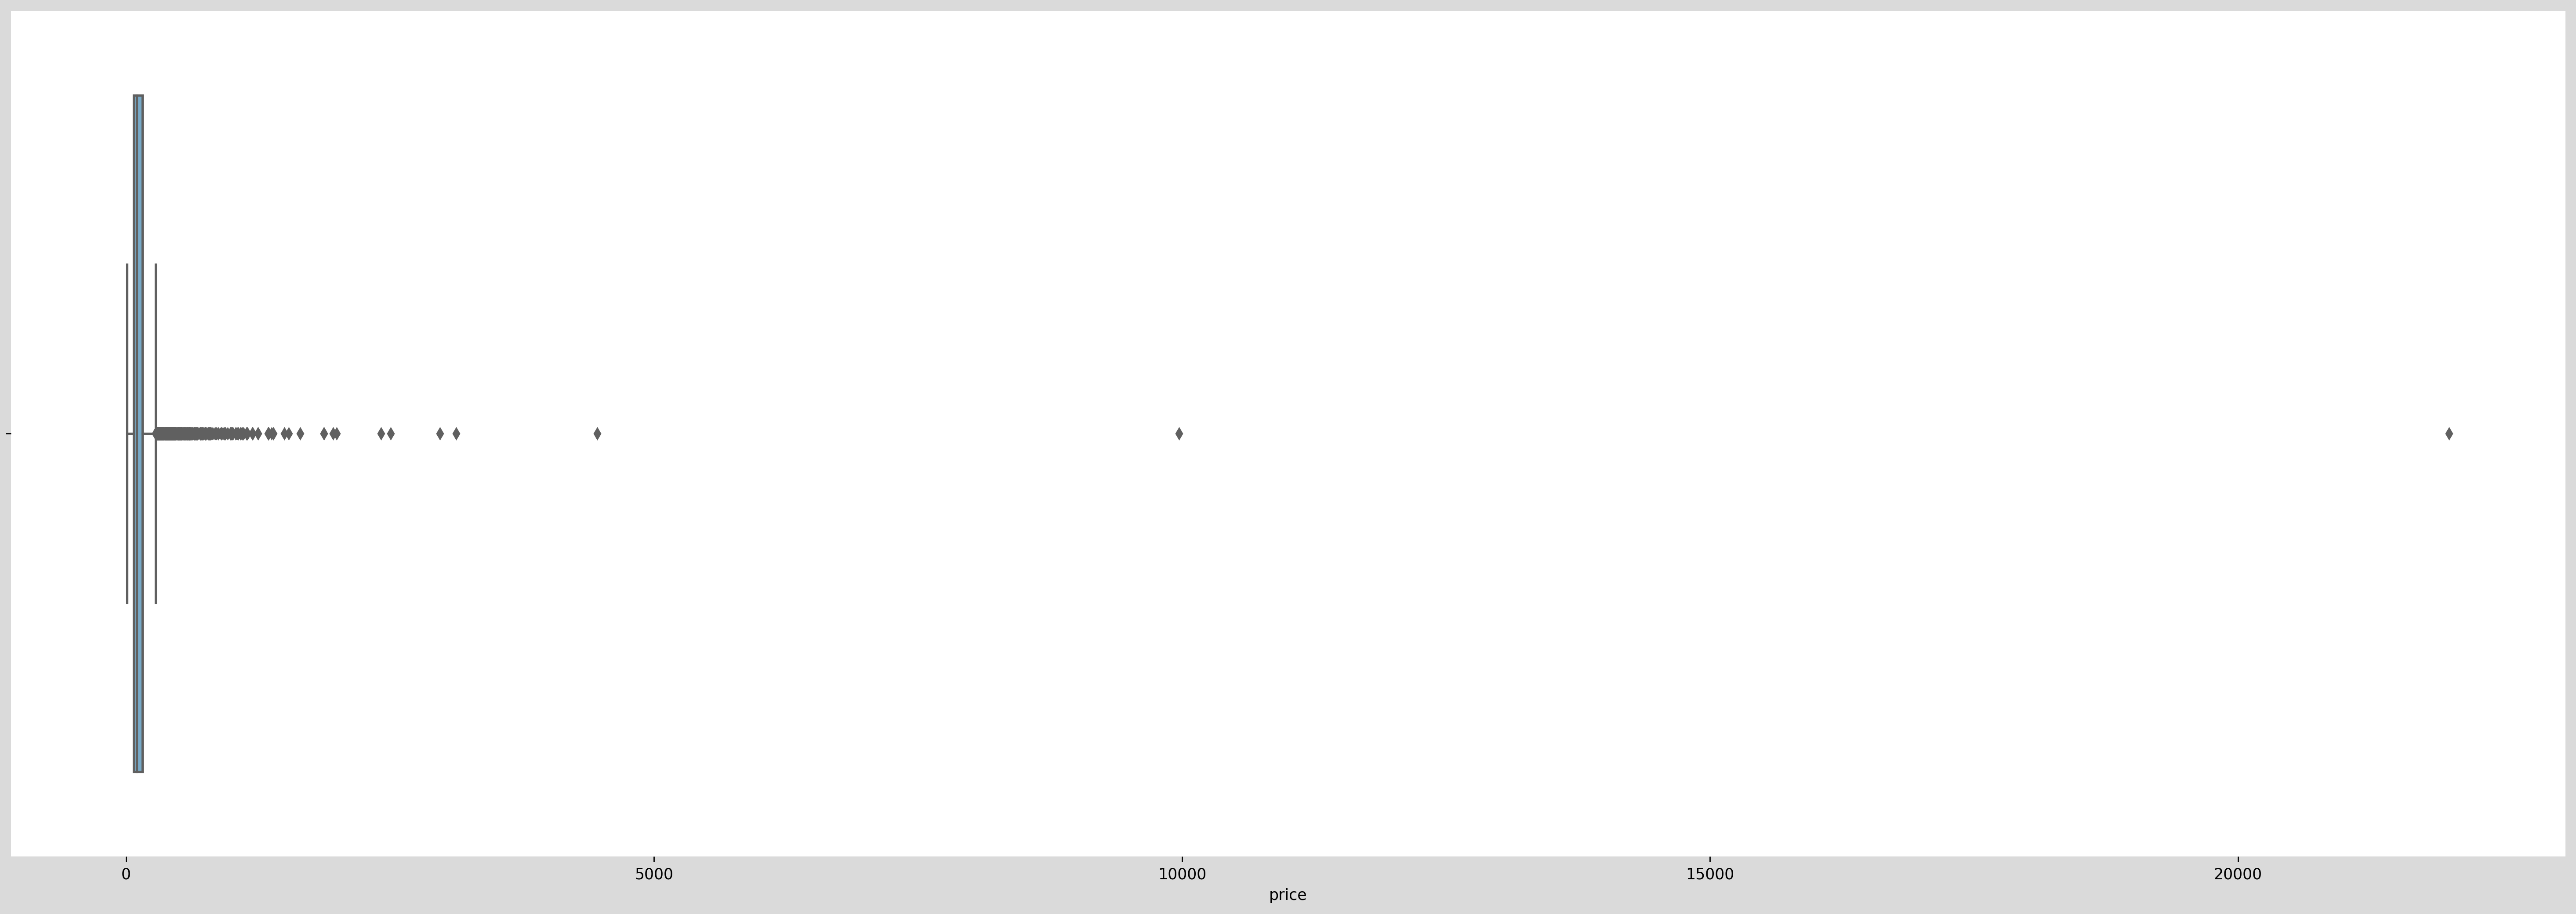

In [16]:
# Suponha que você queira criar um boxplot da coluna 'price' em seu DataFrame 'airbnb'
plt.figure(dpi=250, facecolor='#dadada', figsize=(30, 10))

sns.boxplot(x=dataset_airbnb['price'], palette='Blues')
#plt.ylim(-5000, 5000)  # Defina o limite do eixo y, se necessário

# Remova as bordas indesejadas
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.savefig(r"box2.png")

plt.show()

Its hard to believe that a nightly price of an airbnb would go all the way up to 12000. In short there are a lot of outliers in price that could really throw off our predictions

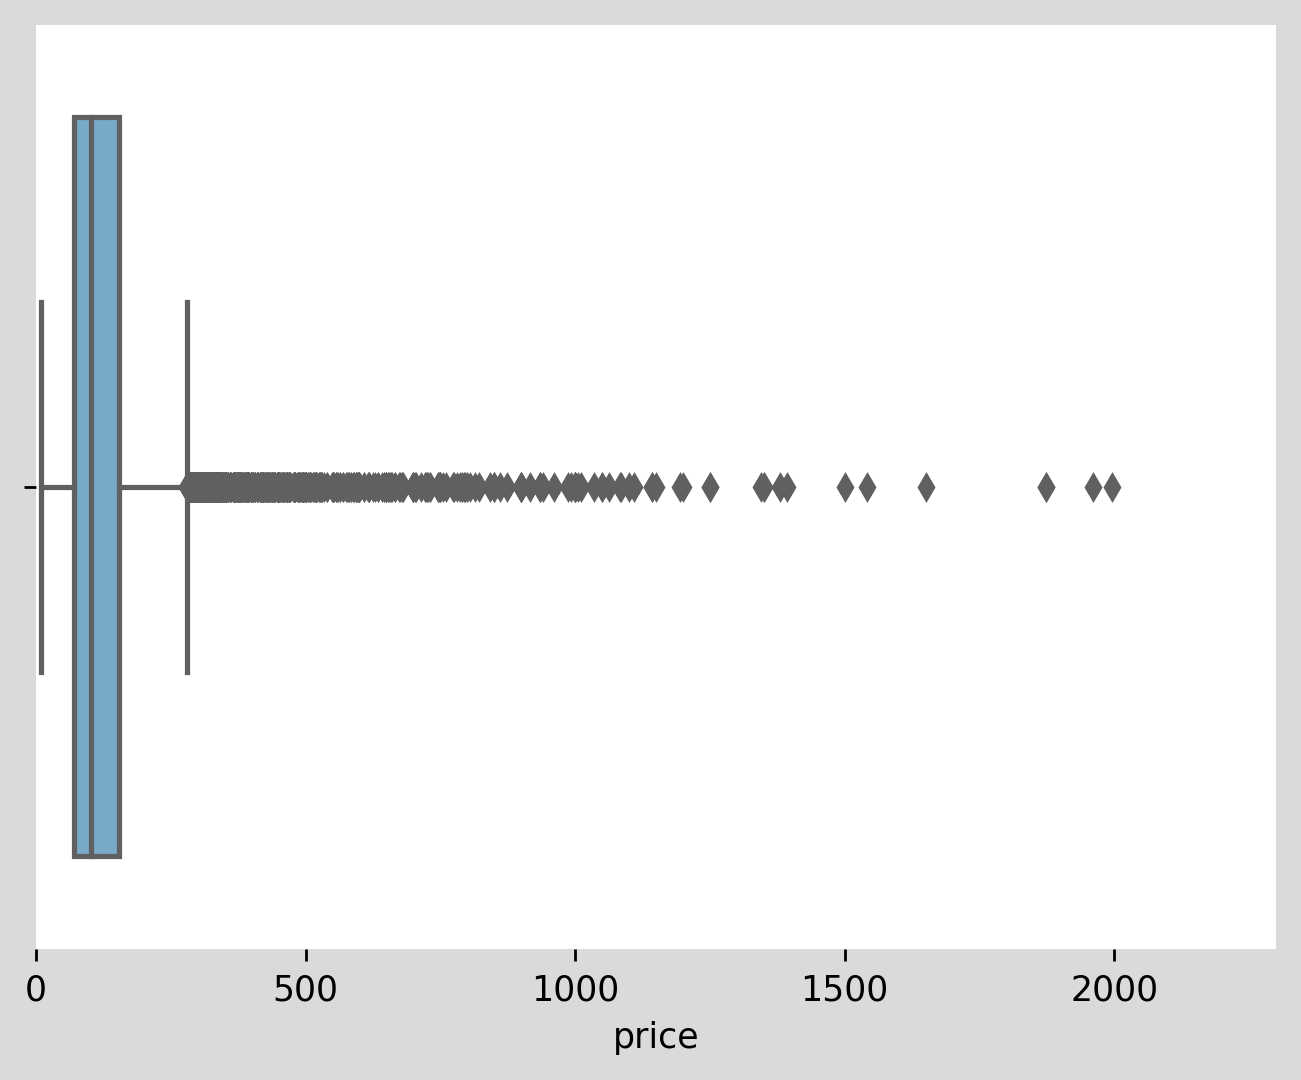

In [17]:
plt.figure(dpi=250, facecolor = '#dadada')
# by limitting the x axis we are no able to see the box
sns.boxplot(x=dataset_airbnb['price'], data=dataset_airbnb, palette='Blues')
plt.xlim(0,2300)

# Remove the splines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.savefig(r"box1.png")

plt.show()


Looking at the box plot interquartile range of airbnb nightly price is between 49 to 110, and about 98 is the mean.

In [18]:
# Selecione a coluna 'host_response_rate' e use describe
estatisticas = dataset_airbnb['price'].describe()

# Exiba as estatísticas resumidas
print(estatisticas)

count    14312.000000
mean       134.456121
std        237.224591
min         10.000000
25%         70.000000
50%        102.000000
75%        154.000000
max      22000.000000
Name: price, dtype: float64


In [19]:
# checking how much did we control the skewness on price
dataset_airbnb.price.skew()

61.0399146788336

In [20]:
#Limpar os outliers

dataset_airbnb = dataset_airbnb[(dataset_airbnb['price'] >= 20) & (dataset_airbnb['price'] <= 220)]

In [21]:
# checking how much did we control the skewness on price
dataset_airbnb.price.skew()

0.5013742893689271

We were able to bring down the skewness of our target variable down to 4.18 from 28.71 and the rest we will take care by applying log later.

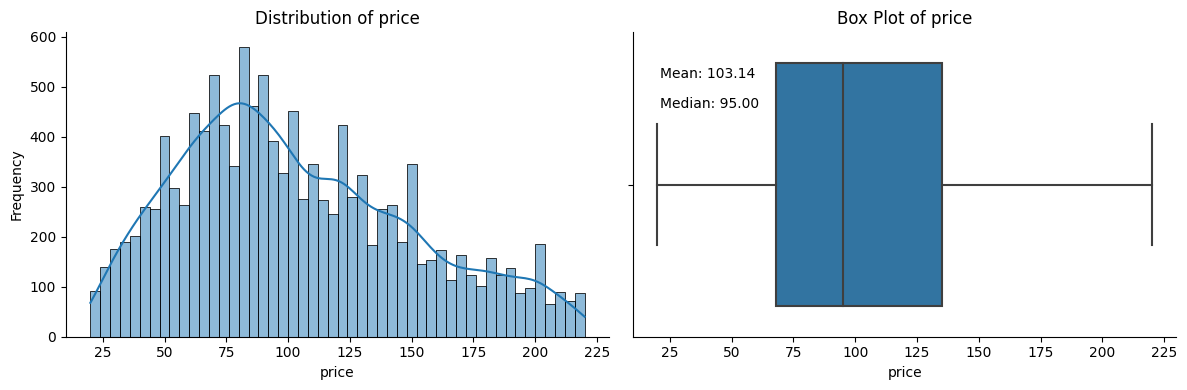

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotting_to_check_skewness():
    col = 'price'

    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

    # Plot a histogram with more bins
    sns.histplot(dataset_airbnb[col], kde=True, bins=50, ax=ax1)

    # Add labels and title
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Distribution of {col}')

    # Plot a box plot to visualize outliers
    sns.boxplot(x=dataset_airbnb[col], ax=ax2)

    # Add labels and title
    ax2.set_xlabel(col)
    ax2.set_title(f'Box Plot of {col}')

    # Display mean and median values
    mean_val = dataset_airbnb[col].mean()
    median_val = dataset_airbnb[col].median()
    ax2.text(0.05, 0.85, f'Mean: {mean_val:.2f}', transform=ax2.transAxes)
    ax2.text(0.05, 0.75, f'Median: {median_val:.2f}', transform=ax2.transAxes)

    # Remove the splines
    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

plotting_to_check_skewness()

# Bathroom text

In [23]:
# Obter os valores únicos da coluna 'bathrooms'
unique_bathrooms = dataset_airbnb['bathrooms_text'].unique()

# Vamos imprimir os valores únicos
print(unique_bathrooms)

['1 bath' '1 private bath' '3 baths' '3 shared baths' '1 shared bath'
 '1.5 baths' '1.5 shared baths' '2 baths' '2.5 baths' '2 shared baths'
 '0 baths' '4 shared baths' '3.5 baths' '0 shared baths'
 '2.5 shared baths' '4.5 baths' 'Half-bath' '5 baths' '10 shared baths'
 '8 shared baths' '4 baths' 'Shared half-bath' '3.5 shared baths'
 '5.5 shared baths' '8.5 baths' '5 shared baths' '4.5 shared baths'
 '6.5 shared baths' '6 shared baths' 'Private half-bath' '6 baths'
 '14 baths']


In [24]:
# Filtrar o DataFrame para manter apenas as linhas com 'room_type' igual a 'Shared room'
shared_room_df = dataset_airbnb[dataset_airbnb['room_type'] == 'Shared room']

# Exibir os valores únicos da coluna 'bathroom_text' no DataFrame filtrado
unique_bathrooms_values = shared_room_df['bathrooms_text'].unique()

# Imprimir os valores únicos
print(unique_bathrooms_values)


['3 shared baths' '1 shared bath' '2 shared baths' '0 shared baths'
 '1.5 shared baths' '5 shared baths' '3.5 shared baths' '4 shared baths'
 '2.5 shared baths']


In [25]:
# Filtrar o DataFrame para manter apenas as linhas com 'room_type' igual a 'Shared room'
shared_room_df = dataset_airbnb[dataset_airbnb['room_type'] == 'Private room']

# Exibir os valores únicos da coluna 'bathroom_text' no DataFrame filtrado
unique_bathrooms_values = shared_room_df['bathrooms_text'].unique()

# Imprimir os valores únicos
print(unique_bathrooms_values)

['1 private bath' '1 shared bath' '1.5 shared baths' '1.5 baths' '1 bath'
 '2 shared baths' '4 shared baths' '2 baths' '0 shared baths'
 '2.5 shared baths' 'Half-bath' '10 shared baths' '3 shared baths'
 '3.5 baths' '8 shared baths' '3 baths' '3.5 shared baths'
 '5.5 shared baths' '8.5 baths' '2.5 baths' '5 shared baths' '4 baths'
 '6.5 shared baths' '6 shared baths' 'Private half-bath'
 'Shared half-bath' '6 baths' '14 baths' '0 baths']


Vou apenas manter o número e retirar a informação quanto ao tipo de casa de banho

In [26]:
# Criar uma nova coluna 'bathrooms' com os números extraídos de 'bathroom_text'
dataset_airbnb['bathrooms'] = dataset_airbnb['bathrooms_text'].str.extract(r'(\d+\.*\d*)').astype(float)

# Substituir valores vazios (NaN) por 0.5
dataset_airbnb['bathrooms'].fillna(0.5, inplace=True)

# Remover a coluna 'bathroom_text' do DataFrame
dataset_airbnb.drop(columns=['bathrooms_text'], inplace=True)

# Exibir o DataFrame resultante
print(dataset_airbnb[['bathrooms']].head(20))

    bathrooms
0         1.0
1         1.0
2         3.0
3         3.0
4         1.0
5         3.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
15        1.0
16        1.0
17        1.5
19        1.0
20        1.0
21        1.0


In [27]:
# Obter os valores únicos da coluna 'bathrooms'
unique_bathrooms = dataset_airbnb['bathrooms'].unique()

# Vamos imprimir os valores únicos
print(unique_bathrooms)

[ 1.   3.   1.5  2.   2.5  0.   4.   3.5  4.5  0.5  5.  10.   8.   5.5
  8.5  6.5  6.  14. ]


In [28]:
dataset_airbnb.dtypes
dataset_airbnb.head()

,host_since,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bathrooms
0,2019-07-12,Belm,38.671280,-9.230640,Entire home/apt,6,3.0,5.0,"[""Game console"", ""Shampoo"", ""Fire extinguisher...",95.0,...,4.86,4.86,4.76,4.90,4.90,4.76,4.71,1,0.56,1.0
1,2014-10-05,Aveiras de Cima,39.165900,-8.884790,Private room,2,1.0,1.0,"[""Free parking on premises"", ""Bed linens"", ""Sm...",25.0,...,5.00,5.00,4.88,5.00,5.00,4.63,5.00,1,2.14,1.0
2,2018-03-01,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,6,3.0,6.0,"[""Waterfront"", ""Baby safety gates"", ""Washer"", ...",65.0,...,4.78,4.78,4.83,4.83,4.83,4.28,4.64,2,0.89,3.0
3,2018-04-22,Carcavelos e Parede,38.684360,-9.351100,Entire home/apt,4,2.0,2.0,"[""Washer"", ""Fire extinguisher"", ""Pool"", ""Free ...",174.0,...,4.60,4.40,4.50,4.50,4.60,4.90,4.60,20,1.75,3.0
4,2018-09-04,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,4,2.0,2.0,"[""Waterfront"", ""Shampoo"", ""Fire extinguisher"",...",59.0,...,4.25,4.75,4.67,4.92,4.92,4.83,4.33,3,0.27,1.0


In [29]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12641 entries, 0 to 14311
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      12641 non-null  object 
 1   neighbourhood_cleansed          12641 non-null  object 
 2   latitude                        12641 non-null  float64
 3   longitude                       12641 non-null  float64
 4   room_type                       12641 non-null  object 
 5   accommodates                    12641 non-null  int64  
 6   bedrooms                        12641 non-null  float64
 7   beds                            12641 non-null  float64
 8   amenities                       12641 non-null  object 
 9   price                           12641 non-null  float64
 10  minimum_nights                  12641 non-null  int64  
 11  maximum_nights                  12641 non-null  int64  
 12  availability_30                 

#Amenities


In [30]:
unique_amenities_values = dataset_airbnb['amenities'].unique()
print(unique_amenities_values)

['["Game console", "Shampoo", "Fire extinguisher", "Cleaning products", "Outdoor furniture", "Private fenced garden or backyard", "Free street parking", "Barbecue utensils", "Private patio or balcony", "Board games", "Wine glasses", "Oven", "Long term stays allowed", "Shower gel", "Private entrance", "Freezer", "Carbon monoxide alarm", "Wifi", "Kitchen", "Hot water", "Baking sheet", "Iron", "Dedicated workspace", "HDTV with Chromecast, standard cable, Netflix, premium cable", "Free washer \\u2013 In unit", "First aid kit", "Beach essentials", "Hair dryer", "Dishes and silverware", "Bathtub", "Children\\u2019s books and toys", "Smoke alarm", "Building staff", "Cable TV", "Coffee maker", "Hangers", "Outdoor dining area", "Single level home", "Pack \\u2019n play/Travel crib - available upon request", "Body soap", "Conditioner", "BBQ grill", "Bed linens", "Luggage dropoff allowed", "Cooking basics", "Children\\u2019s dinnerware", "Refrigerator", "Toaster", "Hot water kettle", "Essentials",

In [31]:
pip install wordcloud

<ipython-input-32-60efa5c1b91f>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')


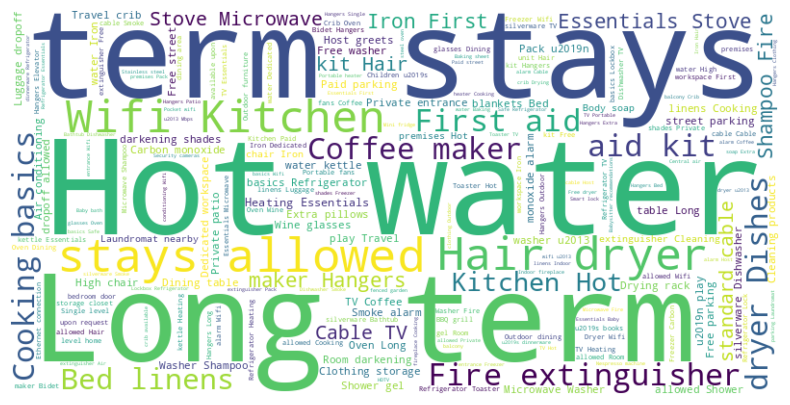

In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supondo que você tenha uma coluna 'amenities' no seu DataFrame 'dataset_airbnb'
amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')

all_amenities = ' '.join([amenity for sublist in amenities_list for amenity in sublist])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_amenities)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

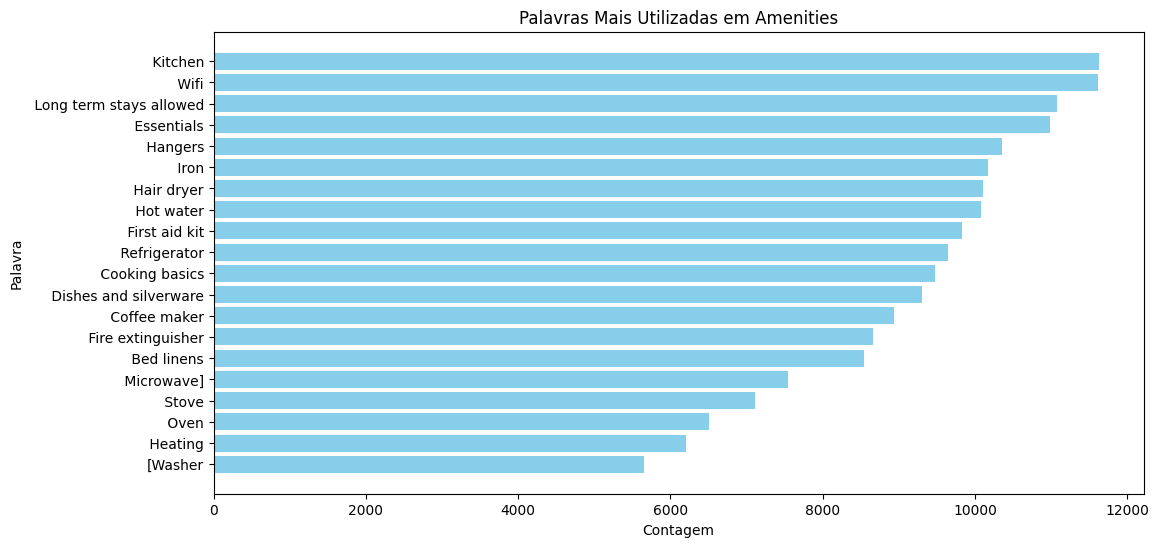

In [33]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

all_words = [word for sublist in amenities_list for word in sublist]

word_counts = Counter(all_words)

top_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Palavra', 'Contagem'])

plt.figure(figsize=(12, 6))
plt.barh(top_words_df['Palavra'], top_words_df['Contagem'], color='skyblue')
plt.xlabel('Contagem')
plt.ylabel('Palavra')
plt.title('Palavras Mais Utilizadas em Amenities')
plt.gca().invert_yaxis()
plt.show()

In [34]:
from collections import Counter

# Supondo que você tenha uma coluna 'amenities' no seu DataFrame 'dataset_airbnb'
amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')

# Criar uma lista plana de todas as palavras em 'amenities'
all_amenities = [word for sublist in amenities_list for word in sublist]

# Usar Counter para contar a frequência de cada amenidade
amenities_counts = Counter(all_amenities)

# Classificar as amenidades em ordem crescente de frequência
sorted_amenities = sorted(amenities_counts.items(), key=lambda x: x[1])

# Exibir as amenidades menos usadas (por exemplo, as 10 primeiras)
least_used_amenities = sorted_amenities[:10]

for amenity, count in least_used_amenities:
    print(f"Amenidade: {amenity}, Frequência: {count}")

<ipython-input-34-3b04f8de9a8c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')


Amenidade:  Shared outdoor pool - saltwater, Frequência: 1
Amenidade:  IKEA  Eneby Bluetooth sound system, Frequência: 1
Amenidade:  60\ HDTV with HBO Max, Frequência: 1
Amenidade:  80\ TV, Frequência: 1
Amenidade:  N\u00e3o especificad oven, Frequência: 1
Amenidade:  N\u00e3o especificado stove, Frequência: 1
Amenidade:  N\u00e3o especificada shampoo, Frequência: 1
Amenidade:  N\u00e3o especificado refrigerator, Frequência: 1
Amenidade: [Fast wifi \u2013 332 Mbps, Frequência: 1
Amenidade:  Body shop body soap, Frequência: 1


In [35]:
# Supondo que você tenha uma coluna 'amenities' no seu DataFrame 'dataset_airbnb'
amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')

# Criar uma lista plana de todas as palavras em 'amenities'
all_amenities = [word for sublist in amenities_list for word in sublist]

# Usar o set para obter amenidades únicas e, em seguida, contar quantas são únicas
unique_amenities = set(all_amenities)
total_unique_amenities = len(unique_amenities)

# Exibir o total de amenidades únicas
print("Total de amenidades únicas:", total_unique_amenities)

<ipython-input-35-72ce854d8400>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')


Total de amenidades únicas: 1730


In [36]:
from collections import Counter

# Supondo que você tenha uma coluna 'amenities' no seu DataFrame 'dataset_airbnb'
amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')

# Criar uma lista plana de todas as palavras em 'amenities'
all_amenities = [word for sublist in amenities_list for word in sublist]

# Usar Counter para contar a frequência de cada amenidade
amenities_counts = Counter(all_amenities)

# Contar quantas amenidades diferentes têm frequência inferior a 3000
amenities_below_3000 = sum(1 for count in amenities_counts.values() if count < 3000)

print(f"Quantidade de amenidades diferentes com frequência inferior a 3000: {amenities_below_3000}")

<ipython-input-36-945c723f0fe9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')


Quantidade de amenidades diferentes com frequência inferior a 3000: 1688


Não faz sentido incorporar um amenity que quase nunca é utilizado. Deste modo não vamos considerar os que tem uma frequência inferior a 3000. Por outro lado também não vamos admitir um amenity que se repita em práticamente todos os casos.
E portanto tendo em conta estes fatores e com base em pesquisa e experiência pessoal iremos selecionar os amenities que mais impacto poderão ter no preço

In [37]:
import pandas as pd
from collections import Counter

# Suponha que você tenha uma coluna 'amenities' no seu DataFrame 'dataset_airbnb'
amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')

# Criar uma lista plana de todas as palavras em 'amenities'
all_words = [word for sublist in amenities_list for word in sublist]

# Contar a frequência de cada palavra
word_counts = Counter(all_words)

# Criar um DataFrame com todas as palavras e suas contagens
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Amenity', 'Count'])

# Classificar o DataFrame pela contagem em ordem decrescente
sorted_word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Exibir a lista completa dos 42 amenities mais comuns
top_42_amenities = sorted_word_counts_df.head(42)
print(top_42_amenities)

<ipython-input-37-8cfaa7f2b4bb>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = dataset_airbnb['amenities'].str.replace('[{}""]', '').str.split(',')


                         Amenity  Count
18                       Kitchen  11634
17                          Wifi  11619
12       Long term stays allowed  11078
52                    Essentials  10983
38                       Hangers  10353
21                          Iron  10169
30                    Hair dryer  10104
19                     Hot water  10076
28                 First aid kit   9835
49                  Refrigerator   9642
47                Cooking basics   9476
31         Dishes and silverware   9300
37                  Coffee maker   8932
2              Fire extinguisher   8655
45                    Bed linens   8541
54                    Microwave]   7541
53                         Stove   7115
11                          Oven   6508
101                      Heating   6206
90                       [Washer   5655
36                      Cable TV   5342
80                    Dishwasher   5124
85    Extra pillows and blankets   4556
105                           TV   4467


In [38]:
# Verifique se a coluna 'amenities' contém as palavras-chave
dataset_airbnb['Air conditioning'] = dataset_airbnb['amenities'].str.contains('Air conditioning').astype(int)
dataset_airbnb['TV'] = dataset_airbnb['amenities'].str.contains('TV').astype(int)
dataset_airbnb['Extra pillows and blankets'] = dataset_airbnb['amenities'].str.contains('Extra pillows and blankets').astype(int)
dataset_airbnb['Heating'] = dataset_airbnb['amenities'].str.contains('Heating').astype(int)

In [39]:
# Remova a coluna 'amenities'
dataset_airbnb.drop(columns=['amenities'], inplace=True)

In [40]:
dataset_airbnb.head()

,host_since,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bathrooms,Air conditioning,TV,Extra pillows and blankets,Heating
0,2019-07-12,Belm,38.671280,-9.230640,Entire home/apt,6,3.0,5.0,95.0,2,...,4.90,4.76,4.71,1,0.56,1.0,0,1,0,0
1,2014-10-05,Aveiras de Cima,39.165900,-8.884790,Private room,2,1.0,1.0,25.0,1,...,5.00,4.63,5.00,1,2.14,1.0,0,1,0,0
2,2018-03-01,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,6,3.0,6.0,65.0,5,...,4.83,4.28,4.64,2,0.89,3.0,0,1,1,0
3,2018-04-22,Carcavelos e Parede,38.684360,-9.351100,Entire home/apt,4,2.0,2.0,174.0,2,...,4.60,4.90,4.60,20,1.75,3.0,0,1,1,1
4,2018-09-04,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,4,2.0,2.0,59.0,3,...,4.92,4.83,4.33,3,0.27,1.0,0,1,0,0


# Correlations

<ipython-input-41-ae82659cce23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset_airbnb.corr()


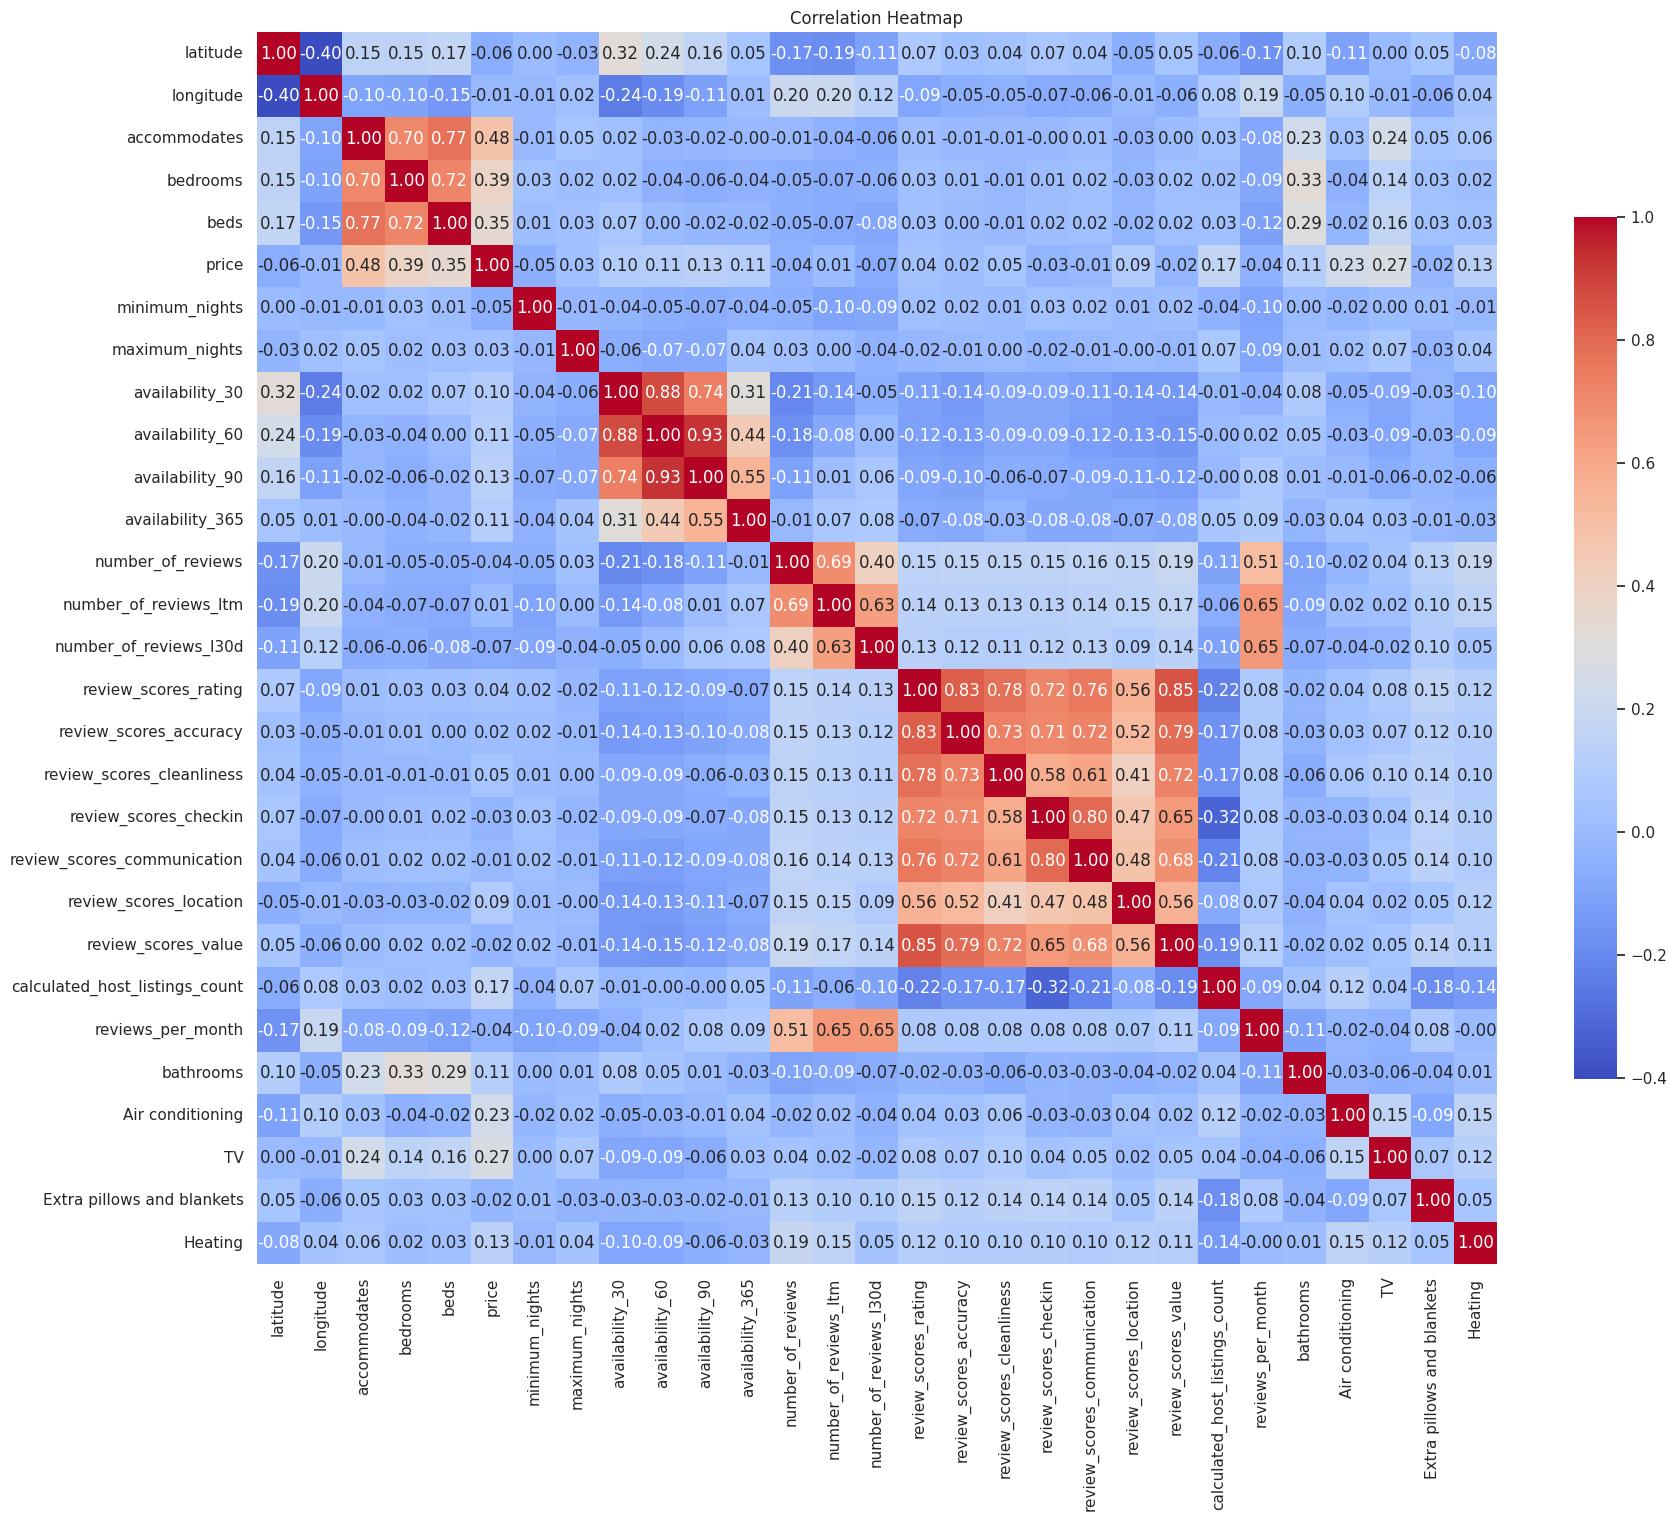

In [41]:
# Calculate the correlation matrix
correlation_matrix = dataset_airbnb.corr()

# Set the size of each cell in the heatmap
sns.set(rc={'figure.figsize':(20,16)})

# Create a heatmap with larger squares
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.7})

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Com base na matrix de correlação iremos fazer drop de variáveis que apresentam um elevado grau de correlação.

As camas, os quartos e o número de pessoas que uma propriedade acomoda estão altamente correlacionados. O número de pessoas acomodadas tem sido tradicionalmente um parâmetro de pesquisa de maior prioridade na Airbnb, uma vez que é mais relevante para quartos privados e partilhados do que o número de quartos

In [42]:
dataset_airbnb.drop(columns=['beds', 'bedrooms'],inplace=True)

Dos três disponibilidade_30, disponibilidade_60, disponibilidade_90, dois também poderiam ser suprimidos, uma vez que estão altamente correlacionados entre si

In [43]:
dataset_airbnb.drop(columns=['availability_60', 'availability_90'],inplace=True)

Areas of multi-collinearity:
                                                                            
- There are strong negative correlations between property_type_House and property_type_Apartment, and between room_type_Private room and room_type_Entire_home_apt (as these were the main two categories of their features before they were one-hot encoded). Although these are important categories, one of each will be dropped in order to reduce multi-collinearity (apartments and private rooms, as these are the second most common categories).

`review ratings columns`

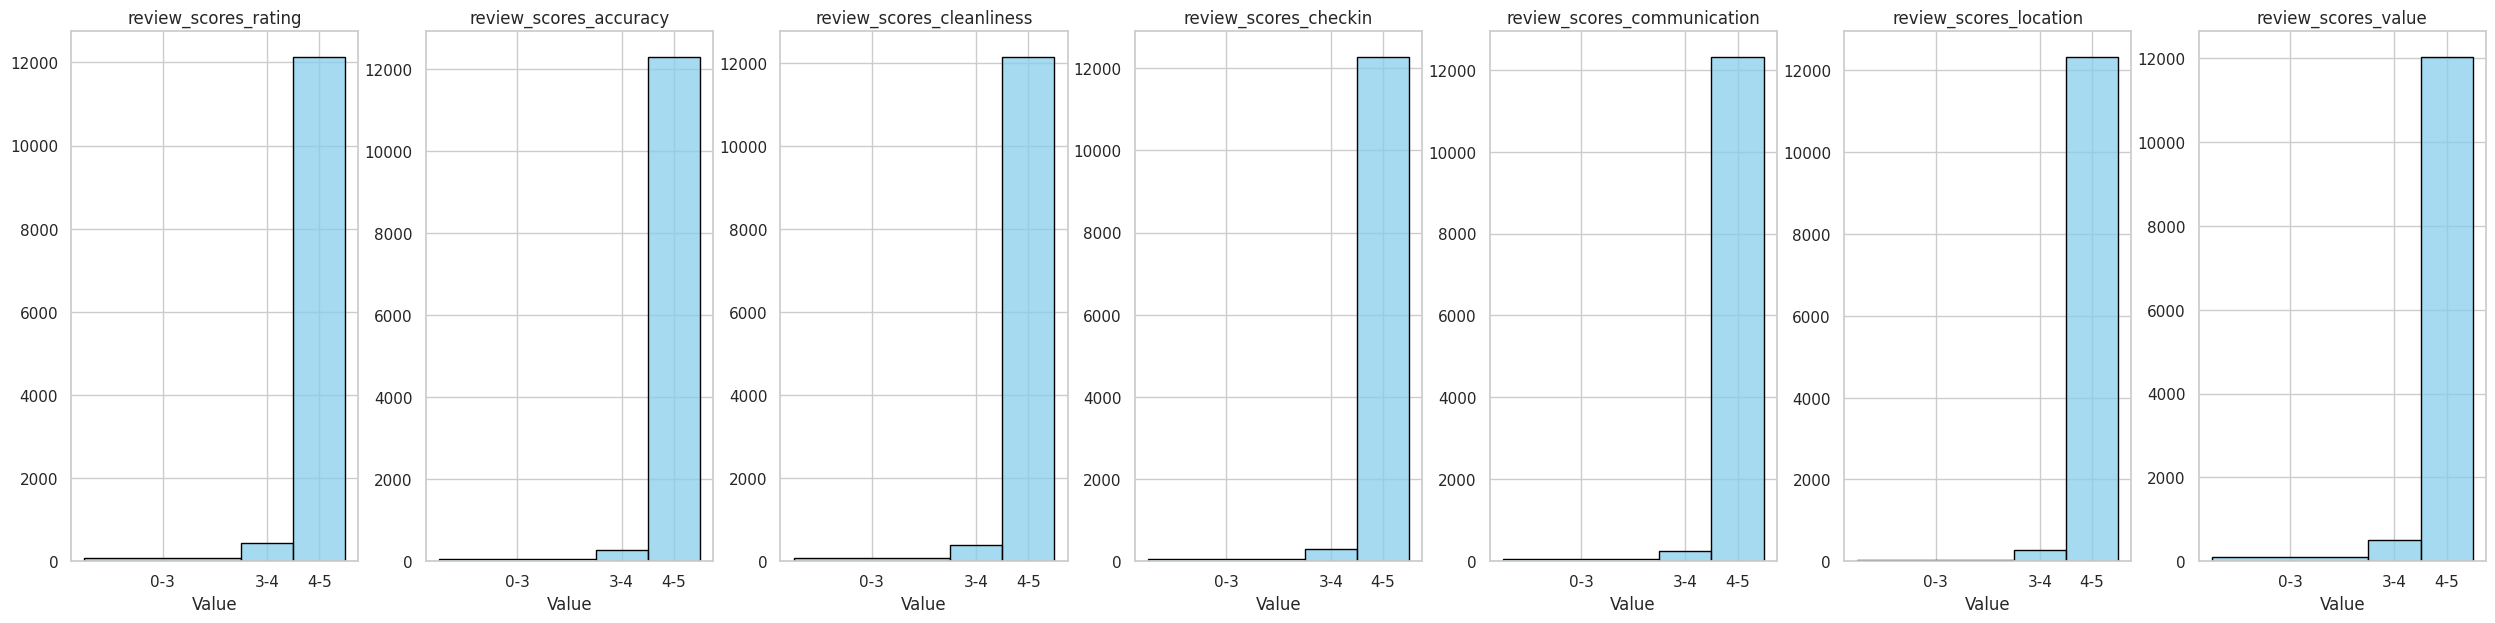

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# List of review rating columns
review_rating_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(1, len(review_rating_columns), figsize=(25, 6))
fig.tight_layout()

# Define the custom bins
custom_bins = [0, 3, 4, 5]

# Plot histograms for each review rating column with custom bins and styling
for i, col in enumerate(review_rating_columns):
    ax = axes[i]
    sns.histplot(dataset_airbnb[col].dropna(), bins=custom_bins, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('')
    ax.set_xticks([1.5, 3.5, 4.5])
    ax.set_xticklabels(['0-3', '3-4', '4-5'])

plt.show()

In [45]:
dataset_airbnb.drop(columns=['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value'],inplace=True)

In [46]:
# Resetting the index as we deleted some rows
dataset_airbnb.reset_index(drop=True, inplace=True)

<ipython-input-47-ae82659cce23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset_airbnb.corr()


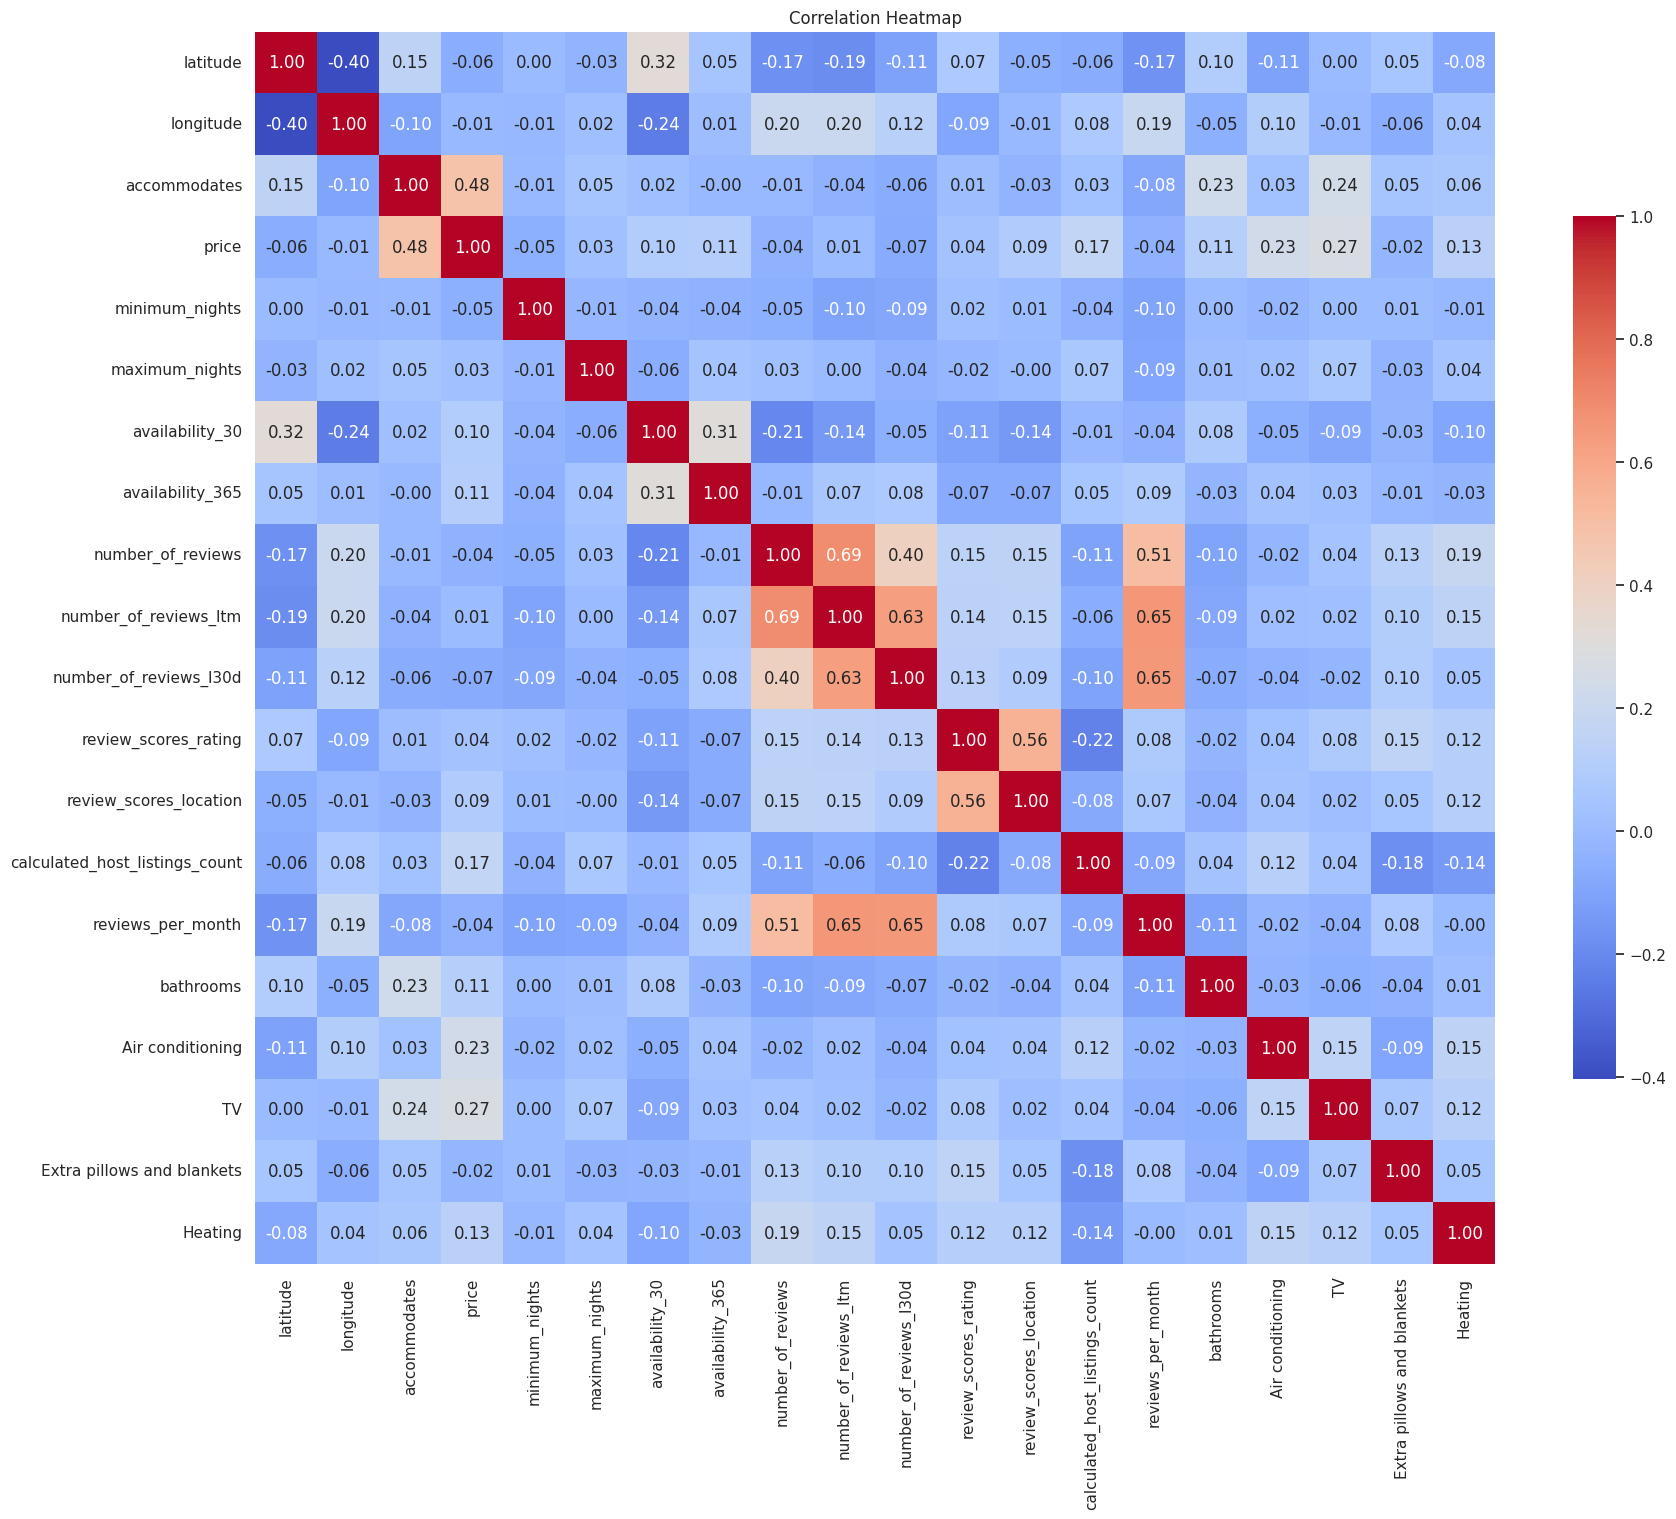

In [47]:
# Calculate the correlation matrix
correlation_matrix = dataset_airbnb.corr()

# Set the size of each cell in the heatmap
sns.set(rc={'figure.figsize':(20,16)})

# Create a heatmap with larger squares
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.7})

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

# Guardar o dataset

In [48]:
dataset_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12641 entries, 0 to 12640
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      12641 non-null  object 
 1   neighbourhood_cleansed          12641 non-null  object 
 2   latitude                        12641 non-null  float64
 3   longitude                       12641 non-null  float64
 4   room_type                       12641 non-null  object 
 5   accommodates                    12641 non-null  int64  
 6   price                           12641 non-null  float64
 7   minimum_nights                  12641 non-null  int64  
 8   maximum_nights                  12641 non-null  int64  
 9   availability_30                 12641 non-null  int64  
 10  availability_365                12641 non-null  int64  
 11  number_of_reviews               12641 non-null  int64  
 12  number_of_reviews_ltm           

In [49]:

dataset_airbnb.to_csv('Recolha e tratamento da base de dados Parte 2.csv', index=False)

In [50]:
# Para criar um link de download para o arquivo CSV
from google.colab import files

files.download('Recolha e tratamento da base de dados Parte 2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>